# Question 5

## Part A

### Naive-bayes
naive bayes is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a
particular feature in a class is unrelated to the presence of any other feature.
### Optimal-bayes
The Bayes Optimal Classifier is a probabilistic model that makes the most probable prediction
for a new example. It is described using the Bayes Theorem that provides a principled way for
calculating a conditional probability. It is also closely related to the Maximum a Posteriori: a
probabilistic framework referred to as MAP that finds the most probable hypothesis for a training
dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, scale
from sklearn.metrics import plot_confusion_matrix, accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv("D:\ML\ML_HW1\Data\Breast_cancer_data.csv")

In [3]:
X, y = df.iloc[:, :-1], df.iloc[:, -1]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
classes,counts = np.unique(y, return_counts=True)
print('Class:',list(classes),'Count:',counts)

Class: [0, 1] Count: [212 357]


In [6]:
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

In [7]:
#Finding Prior Probability
classes_train,counts_train = np.unique(y_train, return_counts=True)
print('Class:',list(classes_train),'Count:',counts_train)

total_samples=len(y_train)
print(total_samples)

prior = np.array([ x*1.0/total_samples for x in counts_train ])

Class: [0, 1] Count: [169 286]
455


In [8]:
#Finding likelihoods assuming gaussian distribution for all.
mean={}
std={}
for i in classes:
    mean[i]=list(np.mean(X_train_scaled[y_train==i],axis=0))
    std[i]=list(np.std(X_train_scaled[y_train==i],axis=0))
    
    
def gaussian_distribution(x, mean, std):
    g = np.sqrt(1.0/2 * np.pi* std**2) * np.exp(-((x - mean)**2/(2 * std**2 )))
    return g   

In [9]:
def likelihood(sample,mean,std):
    
    feature_prob=np.zeros((len(sample),1))
    for i in range(len(sample)):
        feature_prob[i]=gaussian_distribution(sample[i],mean[i],std[i])
    return np.prod(feature_prob)

In [10]:
#Putting likelihood together with prior probabilities to calculate posterior probabilities.

y_pred=[]
for i in X_test_scaled:
 
    class_likelihood=np.zeros(len(classes))
    for cls in classes:
        class_likelihood[int(cls)]=likelihood(i,mean[cls],std[cls])
    posterior=np.multiply(class_likelihood,prior)
    max_index=posterior.argmax()
    y_pred.append(max_index)

## Part B

In [11]:
accuracy=accuracy_score(y_test,y_pred)*100
print(f'accuracy of our model: ',accuracy)
precision = precision_score(y_test,y_pred)
print(f'Precision of our model',precision)
recall = recall_score(y_test,y_pred)
print(f'Recall of our model',recall)

accuracy of our model:  89.47368421052632
Precision of our model 1.0
Recall of our model 0.8309859154929577


In [12]:
confusion_matrix(y_pred, y_test)  

array([[43, 12],
       [ 0, 59]], dtype=int64)

### Analysis.
#### The number of samples of class one is 357 and class zero is 212. All samples of class one are predicted correctly and this can be because of the more number of samples in class one.

## Part C
### Naive Bayes Library

In [13]:
gnb = GaussianNB()
library_pred = gnb.fit(X_train_scaled, y_train).predict(X_test_scaled)

In [14]:
accuracy=accuracy_score(y_test,library_pred)*100
print(f'accuracy of naive bayes library: ',accuracy)
precision = precision_score(y_test,library_pred)
print(f'Precision of naive bayes library',precision)
recall = recall_score(y_test,library_pred)
print(f'Recall of naive bayes library',recall)

accuracy of naive bayes library:  93.85964912280701
Precision of naive bayes library 0.9102564102564102
Recall of naive bayes library 1.0


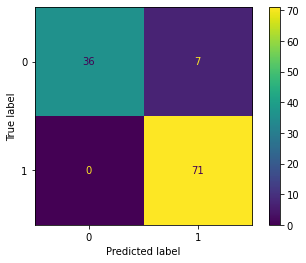

In [15]:
plot_confusion_matrix(gnb, X_test_scaled, y_test)  
plt.show()

### Analysis.
#### The number of samples of class one is 357 and class zero is 212. The number of samples of class one is 357 and class zero is 212. All samples of class one are predicted correctly and this can be because of the more number of samples in class one. Also, the algorithm library uses other parameters, and for this reason, the accuracy of the algorithm is higher than our model's accuracy.